In [ ]:
# B

/Users/chriswilson/Desktop/ames/tf/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['MA_Line2' 'X2TPr_D' 'X2TSc_D' 'X2TPr_S' 'X2TSc_S' 'PA-PostD']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best SVR Parameters: {'C': 100, 'epsilon': 0.1, 'kernel': 'linear'}
SVR Model Mean Squared Error: 515684289.2073701
SVR Model R-squared: 0.9133258550069776


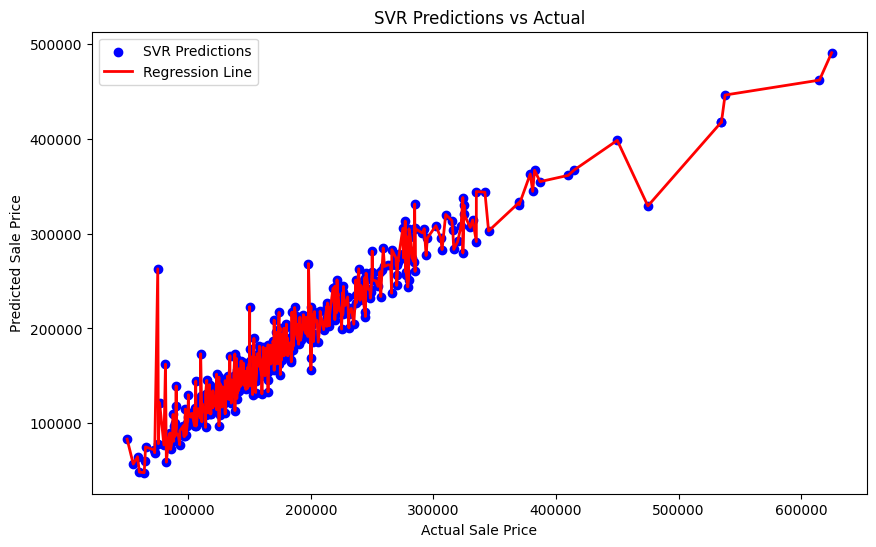

[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=  41.2s
[CV] END ..................C=0.1, epsilon=0.2, kernel=linear; total time=  34.6s
[CV] END ....................C=0.1, epsilon=0.2, kernel=poly; total time=  36.5s
[CV] END ..................C=0.1, epsilon=0.5, kernel=linear; total time=  36.7s
[CV] END ....................C=0.1, epsilon=0.5, kernel=poly; total time=  34.4s
[CV] END .......................C=0.1, epsilon=1, kernel=rbf; total time=  38.0s
[CV] END ....................C=1, epsilon=0.1, kernel=linear; total time=  34.1s
[CV] END ......................C=1, epsilon=0.1, kernel=poly; total time=  34.9s
[CV] END .......................C=1, epsilon=0.2, kernel=rbf; total time=  40.5s
[CV] END ....................C=1, epsilon=0.5, kernel=linear; total time=  34.4s
[CV] END ......................C=1, epsilon=0.5, kernel=poly; total time=  34.1s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=  36.7s
[CV] END ...................

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Import the functions from the module
from data_processing_module import load_data, preprocess_data, split_data

# Cell 2: Use the imported functions
file_path = 'merged3.csv'  # Update this path to the location of your file
target_column = 'SalePrice_x'
drop_columns = ['Unnamed: 0', 'PID', 'Index']

# Load the data
data = load_data(file_path)

# Preprocess the data
X_preprocessed, y, preprocessor = preprocess_data(data, target_column, drop_columns)

# Split the data
X_train, X_test, y_train, y_test = split_data(X_preprocessed, y)

# Define the parameter grid for Support Vector Regressor
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the SVR model
svr_model = SVR()

# Hyperparameter tuning with GridSearchCV
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, scoring='r2', cv=5, n_jobs=-1, verbose=2)
grid_search_svr.fit(X_train, y_train)

# Get the best model
best_svr = grid_search_svr.best_estimator_
print(f"Best SVR Parameters: {grid_search_svr.best_params_}")

# Make predictions with the best model
y_pred_svr = best_svr.predict(X_test)

# Evaluate the SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR Model Mean Squared Error: {mse_svr}')
print(f'SVR Model R-squared: {r2_svr}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='SVR Predictions')

# Sort the predictions and actual values for a smooth line
sorted_indices = np.argsort(y_test.values)
sorted_y_test = y_test.values[sorted_indices]
sorted_y_pred_svr = y_pred_svr[sorted_indices]

# Plot the regression line
plt.plot(sorted_y_test, sorted_y_pred_svr, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('SVR Predictions vs Actual')
plt.legend()
plt.show()
